## Activity: AI based dynamics classification tool, exploiting processing of stabilogram images.
----
<font size = 4 > This repository is containing data analysis of sensor node attached to a dedicated mechanism shown in figure below for collecting postural sway data for the classification of the postural sway behaviour. </font>

----
### Explanation of the setup
Experimental surveys aimed to acquire the dataset have been performed by using the dedicated structure, shown in Fig. 1. This set-up allows for reproducing different dynamics, thus resembling the following movements: 

* **Stable behaviors (ST)**,
* **Antero-Posterior (AP)**, 
* **Medio-Lateral (ML) dynamics**,  
* **Unstable behaviors (UNST)**. 

The sensor node is located on the structure in a position corresponding to the user chest, where H1 is the distance between the sensor node and the bottom joint (on the floor), while H2 is the distance between the node and the belt joint. ML displacements are obtained by manually tilting the system around the belt joint, while APs are generated by exploiting tilting around the bottom joint. 

<font size=4> The sensor setup is depicted in the picture below.</font>

<center> <img src=./img/data-collection-setup.png width=300 height=600> </center>

### Data
<font size = 4 > Data contains extracted features from the accelerometer data sampled at 100Hz . Two features are extracted from the data namely Antero-Posterior Displacement (DAP) and Medio-Lateral displacement (DML).
Starting from three acceleration components, time evolutions of the Antero-Posterior and Medio-Lateral displacement (DAP and DML) have been estimated by the following relationships  
</font> 

$$ DAP = H_1{ A_z\over \sqrt{{A_y}^2+{A_x}^2}} $$
$$ DML = H_2{ A_x\over \sqrt{{A_y}^2+{A_z}^2}} $$
H<sub>1</sub> and H<sub>2</sub> are the distance between the sensor node and the bottom joint (on the floor) and the belt joint respectively.


The dataset is organized as follows:
* In each folder Case_x you can find the time evolution of [DAP DML] for several examples of Standing, AP, ML, Unstable dynamics, obtained by the above-described set-up. 
* Each case represents a different positioning of the sensor node (different heights H1 and H2).


 <font size=4>  <b>Quick Note</b> </font>
 
Plotting DAP against DML you can find the stabilogram for each dynamic, and then you can save as images to be used for training and testing AI classification tool.
If you prefer stabilograms centered around zero DAP-DML values, you have just to remove the mean value from time-series.

## Initial analysis of the data: Read, check sizes etc.

In [3]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'
classes = ['Stab_AP','Stab_Instabile','Stab_ML','Stab_standing']

df = pd.DataFrame()
min_len = 1000000
min_file_name = ''
for filename in glob.iglob(root_dir + '**/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    len_data = len(temp_data)
    if(len_data < min_len):
        min_len = len_data
        min_file_name = filename
    if classes[0] in filename:
        stab_ap = temp_data
    if classes[1] in filename:
        stab_instabile = temp_data
    if classes[2] in filename:
        stab_ml = temp_data
    if classes[3] in filename:
        stab_standing = temp_data
    # pd.concat([df, df_temp], axis=1)
print(min_len)
print(min_file_name)

455
C:/Users/101/repos/postural_sway_analysis/data\Case_5\Stabilogram\Stab_AP11.txt


## Plot different classes

Text(0.5, 1.0, 'Stab_standing')

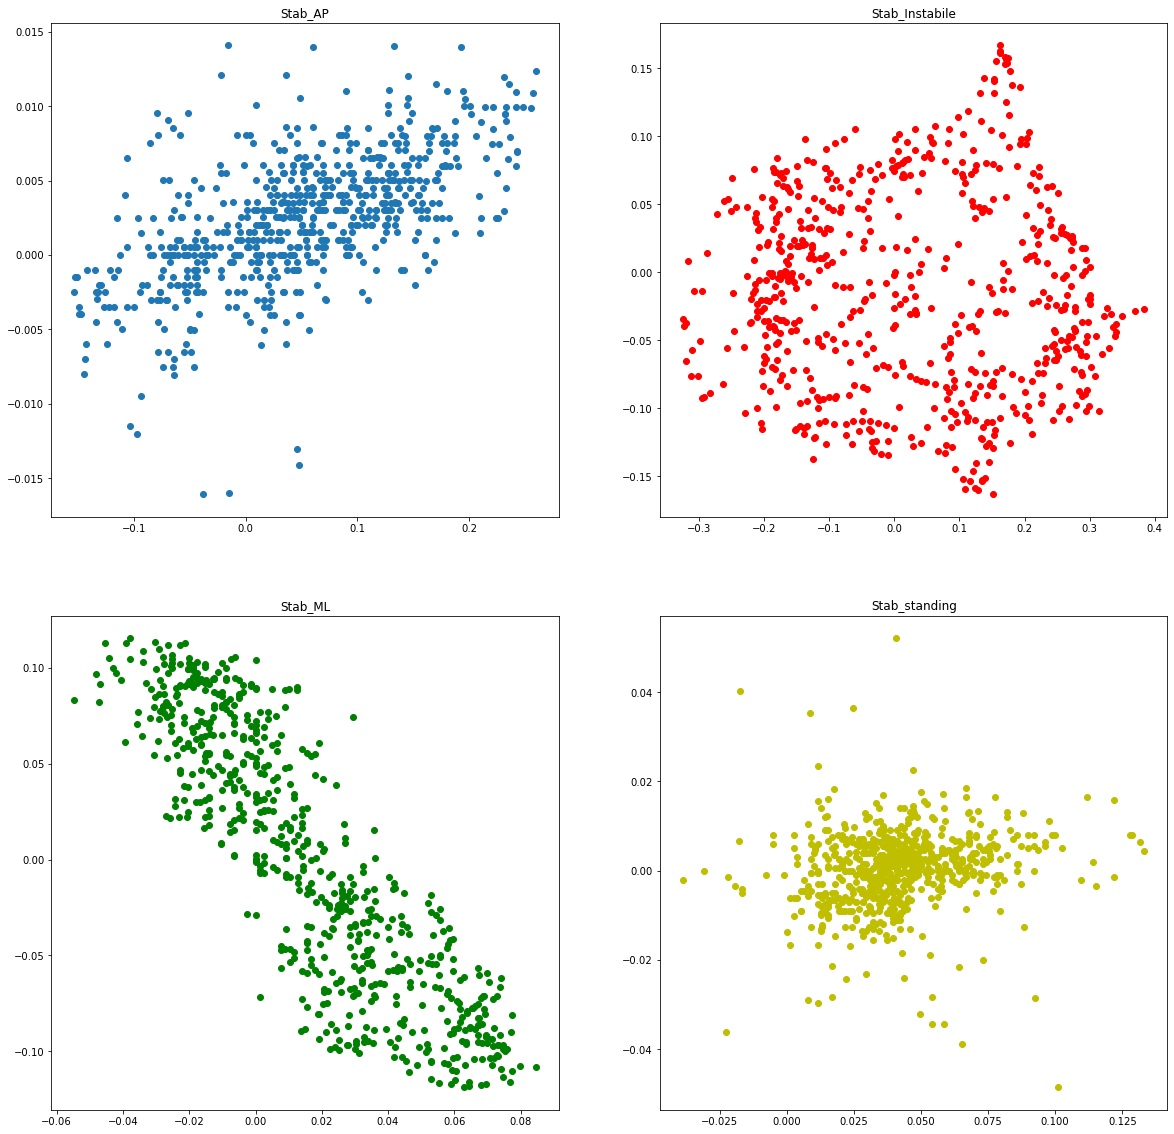

In [3]:
# Plot 2x2 subplots
# %matplotlib
# %matplotlib
fig, axs = plt.subplots(2, 2, figsize=(20,20))
axs[0, 0].scatter(stab_ap[:,0], stab_ap[:,1])
axs[0, 0].set_title('Stab_AP')
axs[0, 1].scatter(stab_instabile[:,0], stab_instabile[:,1], c='r')
axs[0, 1].set_title('Stab_Instabile')
axs[1, 0].scatter(stab_ml[:,0], stab_ml[:,1], c='g')
axs[1, 0].set_title('Stab_ML')
axs[1, 1].scatter(stab_standing[:,0], stab_standing[:,1], c='y')
axs[1, 1].set_title('Stab_standing')


## Concatenate data and plot 

Text(0.5, 1.0, 'Stab_standing')

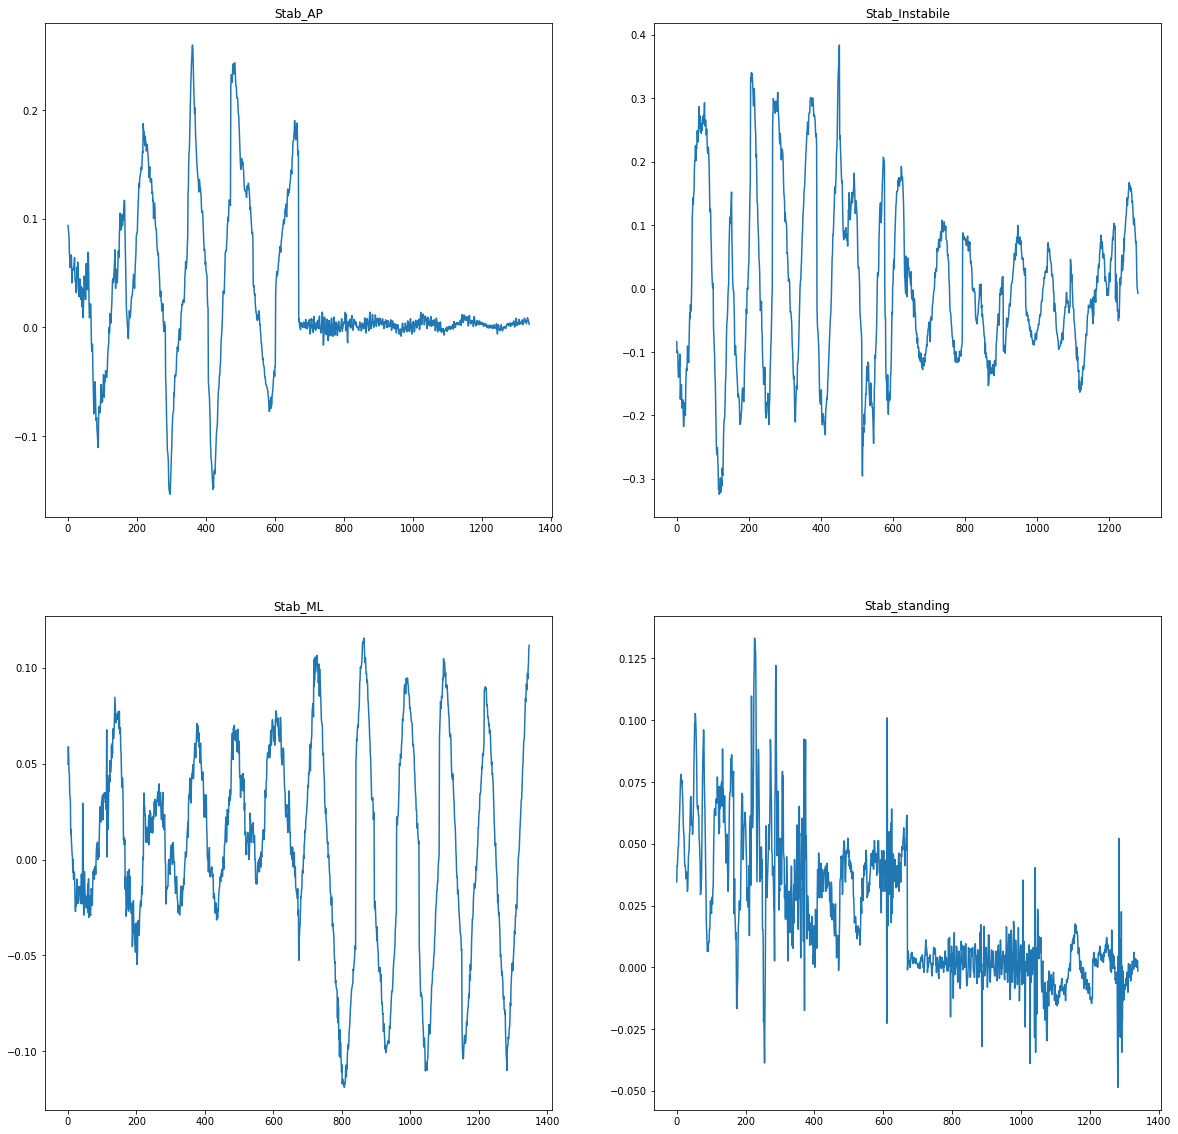

In [4]:
test_stab = np.concatenate((stab_ap[:,0],stab_ap[:,1]), axis=0)
test_ml = np.concatenate((stab_ml[:,0],stab_ml[:,1]), axis=0)
test_instabile = np.concatenate((stab_instabile[:,0],stab_instabile[:,1]), axis=0)
test_standing = np.concatenate((stab_standing[:,0],stab_standing[:,1]), axis=0)
# %matplotlib
fig, axs = plt.subplots(2, 2, figsize=(20,20))
axs[0, 0].plot(test_stab)
axs[0, 0].set_title('Stab_AP')
axs[0, 1].plot(test_instabile)
axs[0, 1].set_title('Stab_Instabile')
axs[1, 0].plot(test_ml)
axs[1, 0].set_title('Stab_ML')
axs[1, 1].plot(test_standing)
axs[1, 1].set_title('Stab_standing')


In [3]:
import collections
import pathlib

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization

import tensorflow_text as tf_text

In [5]:
batch_size = 32
seed = 42
root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/Case_1/'
train_dir = pathlib.Path(root_dir)
raw_train_ds = utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 200 files belonging to 1 classes.
Using 160 files for training.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(10):
    print("Question: ", text_batch.numpy()[i])
    print("Label:", label_batch.numpy()[i])

In [7]:
for i, label in enumerate(raw_train_ds.class_names):
  print("Label", i, "corresponds to", label)

Label 0 corresponds to Stabilogram
